This problem is a supervised machine learning problem. The type of problem is classification type problem. The main goal of 
the problem is to identify into which category the given data falls into. In this case, it is whether the customer of the 
travel insurance company would make a future claim or not. 

In [1]:
# Importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading the data from the given dataset
df = pd.read_csv("C:\\Users\\SRIRAM\\Desktop\\University of Essex\\Assignments\\ML Assignment\\CE802_P2_Data\\CE802_P2_Data.csv")

In [3]:
# Command to visualize the head of the given data
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True


In [4]:
# Command to identify the shape of the data
df.shape

(1500, 16)

In [5]:
# This command gives the information about the data present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   int64  
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


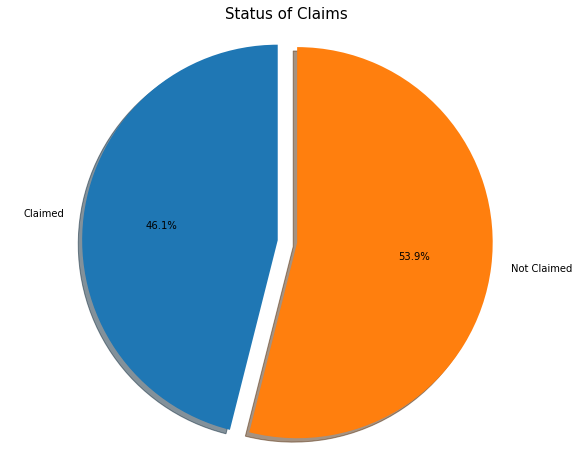

In [6]:
# Finding out the Status of the Class variable
labels = 'Claimed', 'Not Claimed'
sizes = [df.Class[df['Class']==1].count(), df.Class[df['Class']==0].count()]
explode = (0, 0.1) #Transform each element of a list-like to a row, replicating index values
fig1, ax1 = plt.subplots(figsize = (10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title('Status of Claims', size = 15)
plt.show()

In [7]:
#Checking for missing values in the dataset
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [8]:
#Dealing with missing values
median = df['F15'].median()
df['F15'].fillna(median, inplace = True)

In [9]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,16.21000,178.052000,-28.814600,-23.177573,7.708560,456.556000,-1.922947,-5.457533,-14.467060,4.96876,-15.206520,13.528000,-6.477813,218.049333,7.906507
std,13.51472,80.376896,7.635517,5.081288,6.930553,214.250623,2.513850,2.491236,3.326893,4.32521,5.108542,7.159315,3.166909,234.669160,0.710496
min,0.00000,-23.120000,-53.910000,-41.240000,0.000000,218.220000,-6.400000,-13.190000,-27.180000,0.00000,-32.000000,4.890000,-12.940000,0.000000,5.180000
25%,3.00000,146.880000,-34.470000,-26.940000,1.200000,290.220000,-4.330000,-7.292500,-16.200000,1.24000,-19.000000,7.890000,-9.240000,30.000000,7.910000
50%,3.00000,188.880000,-31.785000,-25.140000,2.040000,350.220000,-0.940000,-6.410000,-14.010000,2.07000,-17.200000,9.890000,-3.870000,100.000000,7.910000
75%,30.00000,214.880000,-21.450000,-18.220000,14.100000,638.220000,0.020000,-3.080000,-12.510000,8.20000,-10.215000,20.890000,-3.510000,390.000000,7.910000
max,30.00000,406.880000,-15.120000,-13.860000,20.700000,953.220000,5.740000,-0.950000,-7.380000,15.70000,-6.260000,30.890000,-2.790000,780.000000,10.260000


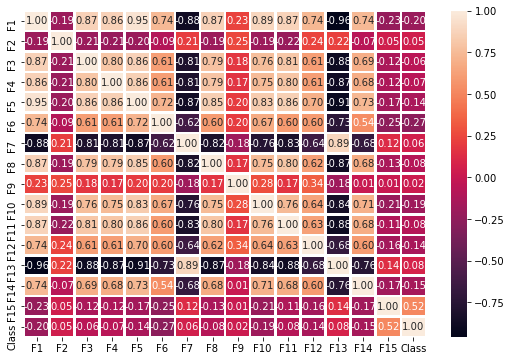

In [10]:
# Finding Correlations
corr = df.corr()

f, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(corr, annot = True, linewidths = 1.5, fmt = '.2f', ax= ax)
plt.show()

# Usually, the problem of multicollinearity affects the performance of the data. So it is a good practice to check the corelations between the variables. There are possibilities that the model may not understand that which variable has more impact over the data. So, in order to avoid the multicollinearity problem, correlation heatmap is generated to find the correlations between the variables.

In [11]:
#Multicollinearity using VIF (Variable inflation factors)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Here, in our data, since the names of the features are not given, so it will be difficult to identify which feature to leave behind. There may be chances that we may remove the feature that is important which may affect the performance of the model. In order to avoid this, we are using a stastical approach in which the Variable Inflation factor (VIF) is found out and we are setting a threshold value of 50. The features with VIF more than 50 are removed from the data.

In [12]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,F1,101.097971
1,F2,9.961384
2,F3,64.870006
3,F4,80.580605
4,F5,35.390994
5,F6,15.351754
6,F7,8.717642
7,F8,25.762767
8,F9,25.884707
9,F10,12.924570


In [13]:
new_df = df.drop(['F1', 'F3', 'F4', 'F13', 'F15'], axis = 1)

In [14]:
new_df

,F2,F5,F6,F7,F8,F9,F10,F11,F12,F14,Class
0,186.88,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,510,False
1,196.88,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,760,False
2,96.88,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,610,False
3,216.88,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,32,False
4,198.88,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,36,True
...,...,...,...,...,...,...,...,...,...,...,...
1495,266.88,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,110,True
1496,206.88,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,260,False
1497,106.88,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,370,True
1498,336.88,17.60,503.22,-5.01,-3.72,-7.98,6.50,-8.60,30.89,250,False


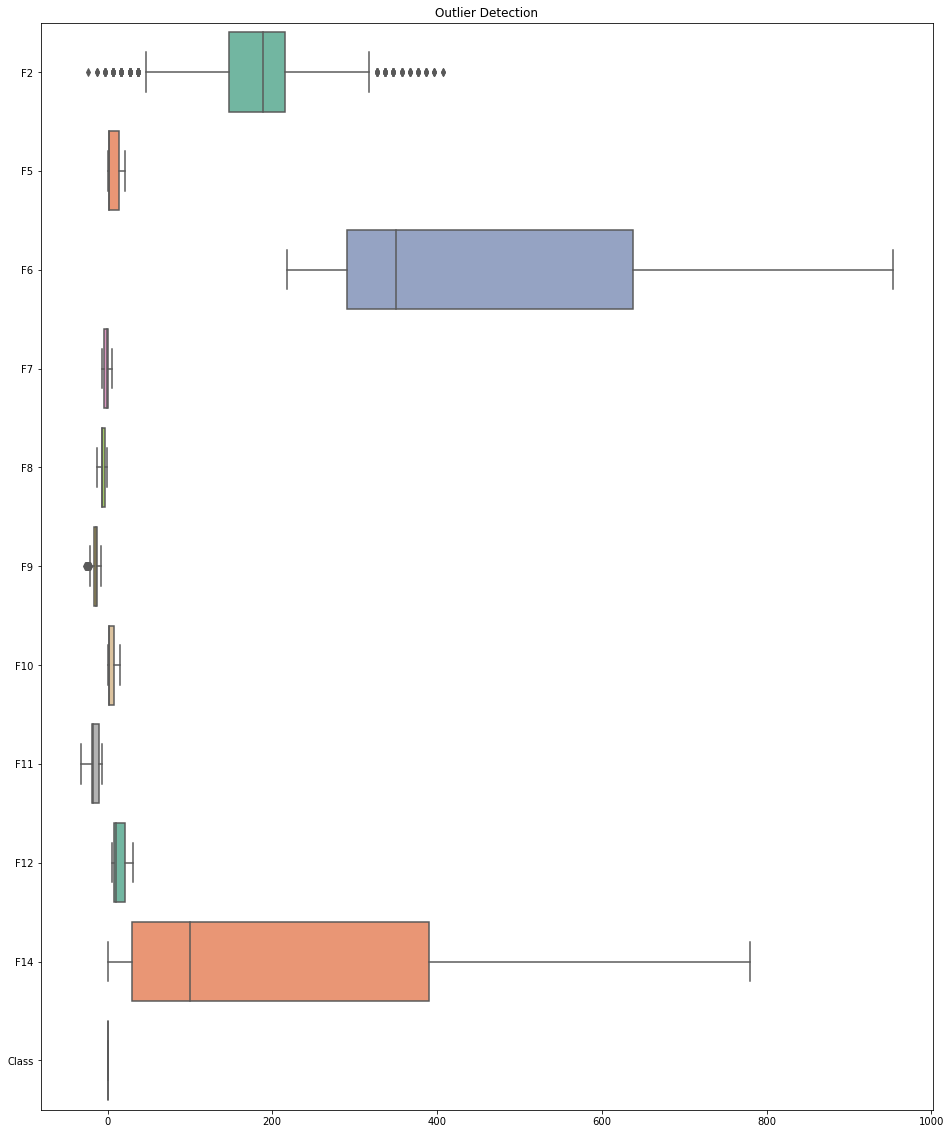

In [15]:
#Visualizing the presence of outliers
f, ax = plt.subplots(figsize = (16, 20))
ax = sns.boxplot(data = new_df, orient = "h", palette = "Set2",)
ax.set_title("Outlier Detection")
plt.show()

# Outliers affect the performance of the model. So it is a good practice to remove the outliers from the data. We have used Interquartile range (IQR) method and using the IQR rule, the outliers are treated from the  given data.

In [16]:
# IQR method to remove outliers from the data
import scipy.stats as stats
Q1 = new_df.quantile(q=.25)
Q3 = new_df.quantile(q=.75)
IQR = new_df.apply(stats.iqr)

data_clean = new_df[~((new_df < (Q1-1.5*IQR)) | (new_df > (Q3+1.5*IQR))).any(axis=1)]

In [17]:
data_clean

,F2,F5,F6,F7,F8,F9,F10,F11,F12,F14,Class
0,186.88,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,510,False
1,196.88,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,760,False
2,96.88,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,610,False
3,216.88,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,32,False
4,198.88,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,36,True
...,...,...,...,...,...,...,...,...,...,...,...
1494,156.88,16.70,398.22,-5.46,-3.46,-12.60,7.40,-7.32,20.89,490,True
1495,266.88,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,110,True
1496,206.88,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,260,False
1497,106.88,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,370,True


In [18]:
#Removing Duplicate values
data_clean.drop_duplicates()

,F2,F5,F6,F7,F8,F9,F10,F11,F12,F14,Class
0,186.88,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,510,False
1,196.88,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,760,False
2,96.88,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,610,False
3,216.88,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,32,False
4,198.88,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,36,True
...,...,...,...,...,...,...,...,...,...,...,...
1494,156.88,16.70,398.22,-5.46,-3.46,-12.60,7.40,-7.32,20.89,490,True
1495,266.88,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,110,True
1496,206.88,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,260,False
1497,106.88,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,370,True


In [19]:
# Defining the dependent and Independent variables
X = data_clean.iloc[:, 0:10].values
y = data_clean.iloc[:, 10].values

In [20]:
X

array([[186.88,  14.2 , 563.22, ...,  -9.44,  10.89, 510.  ],
       [196.88,  19.7 , 353.22, ...,  -8.58,  15.89, 760.  ],
       [ 96.88,  17.3 , 398.22, ...,  -9.18,  20.89, 610.  ],
       ...,
       [206.88,  12.3 , 428.22, ..., -11.56,  30.89, 260.  ],
       [106.88,  13.5 , 623.22, ...,  -7.06,  20.89, 370.  ],
       [218.88,   1.18, 335.22, ..., -25.3 ,   9.89,  16.  ]])

In [21]:
y

array([False, False, False, ..., False,  True,  True])

In [22]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (946, 10)
Shape of X_test: (316, 10)
Shape of y_train: (946,)
Shape of y_test: (316,)


In [24]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SMOTE stands for Synthetic minority oversampling technique. It is a stastical technique to increase the number of cases in the dataset in a balanced way. This technique is used to handle the imbalanced dataset.

In [25]:
# Use smote to deal with imbalance data
from imblearn.over_sampling import SMOTE
import imblearn

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape, y_train.shape)
print(type(X_train), type(y_train))

(968, 10) (968,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [26]:
# Modelling
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 10, splitter = 'best', 
                              min_samples_split = 3, max_features = None)
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)



In [27]:
# SVM Classifier
from sklearn.svm import SVC
svc = SVC(gamma = 'auto', kernel = 'rbf')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)



In [28]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)



In [29]:
# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
# Reports for Decision Tree Classifier
print(classification_report(y_test, pred_dtree))
print(accuracy_score(y_test, pred_dtree))
print(confusion_matrix(y_test, pred_dtree))

              precision    recall  f1-score   support

       False       0.66      0.70      0.68       165
        True       0.65      0.62      0.63       151

    accuracy                           0.66       316
   macro avg       0.66      0.66      0.66       316
weighted avg       0.66      0.66      0.66       316

0.6582278481012658
[[115  50]
 [ 58  93]]


In [31]:
# Reports for SVM Classifier
print(classification_report(y_test, pred_svc))
print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

       False       0.81      0.41      0.54       165
        True       0.58      0.89      0.70       151

    accuracy                           0.64       316
   macro avg       0.69      0.65      0.62       316
weighted avg       0.70      0.64      0.62       316

0.6392405063291139
[[ 67  98]
 [ 16 135]]


In [32]:
# Reports for Random Forest Classifier
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

       False       0.75      0.76      0.75       165
        True       0.73      0.72      0.72       151

    accuracy                           0.74       316
   macro avg       0.74      0.74      0.74       316
weighted avg       0.74      0.74      0.74       316

0.740506329113924
[[126  39]
 [ 43 108]]


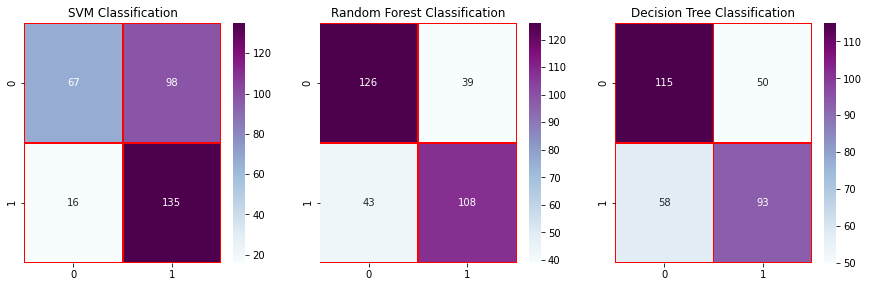

In [33]:
# Visualizing Confusion Matrices
dtree_cm = confusion_matrix(y_test, pred_dtree)
svm_cm = confusion_matrix(y_test, pred_svc)
rfc_cm = confusion_matrix(y_test, pred_rfc)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 3)
ax1.set_title('Decision Tree Classification')
ax2 = fig.add_subplot(3, 3, 1) 
ax2.set_title('SVM Classification') 
ax3 = fig.add_subplot(3, 3, 2) 
ax3.set_title('Random Forest Classification')

sns.heatmap(data=dtree_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax1)
sns.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax2)
sns.heatmap(data=rfc_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax3) 

plt.show()

In [34]:
# Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [35]:
#Hyperparameter Tuning
# Tuning Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

param_grid = {'min_samples_split':[4, 7, 10, 12]}
dtree_grid = GridSearchCV(dtree, param_grid, cv = 10, refit = True, verbose = 1)
dtree_grid.fit(X_train, y_train)

print(dtree_grid.best_score_)
print(dtree_grid.best_params_)
print(dtree_grid.best_estimator_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6580541237113402
{'min_samples_split': 10}
DecisionTreeClassifier(min_samples_split=10)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


In [36]:
# Tuning for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [6,7,8,9,10],  
              'min_samples_split': [5, 6, 7, 8]}

rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 10.8min finished


0.7407646048109966
{'max_depth': 8, 'max_features': 6, 'min_samples_split': 5}
RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=5)


In [37]:
# SVC Grid SearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 25, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100], 'kernel':['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid, cv = 5, refit = True, verbose = 3, scoring = 'accuracy')
svc_grid.fit(X_train, y_train)

print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.557, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.552, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.497, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.497, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.557, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.552, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.497, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.497, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=0.1, kernel=rbf, score=0.562, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   16.9s finished


C:\Users\SRIRAM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


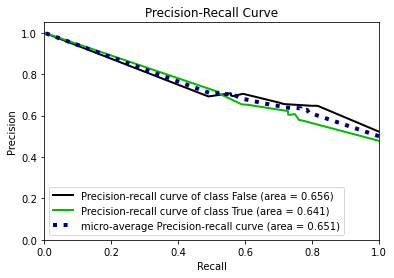

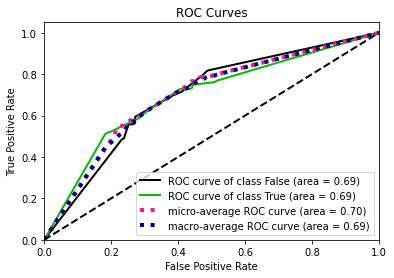

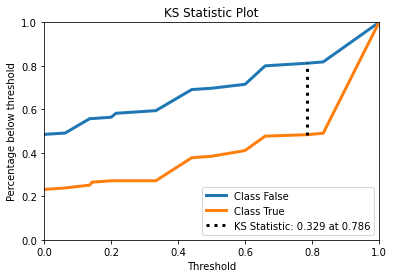

In [39]:
# Evaluation metrics plotting
# Decision Tree
import scikitplot as skplt

from sklearn.tree import DecisionTreeClassifier
dtree =  DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 10, splitter = 'best', 
                                min_samples_split = 3, max_features = None)
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

y_pred_test  =dtree.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_test)
skplt.metrics.plot_roc (y_test,y_pred_test)
y_pred_test  = dtree.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_test)

C:\Users\SRIRAM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


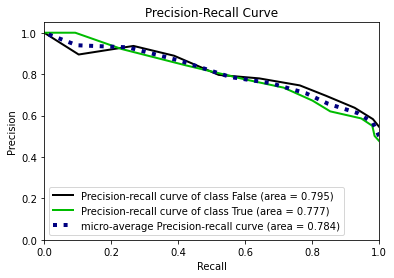

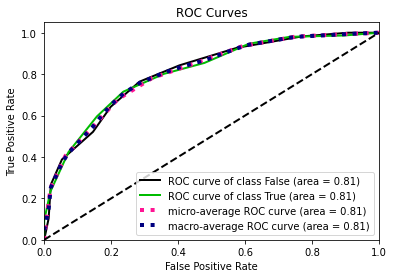

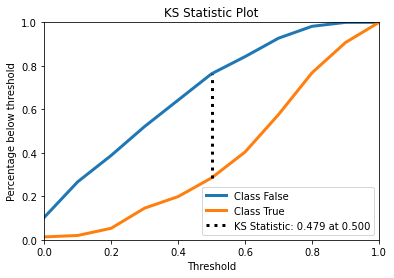

In [40]:
# Random Forest Classifier
import scikitplot as skplt

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

y_pred_test  =rfc.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_test)
skplt.metrics.plot_roc (y_test,y_pred_test)
y_pred_test  = rfc.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_test)

In [41]:
# Performance Comparison

names = ["Decision Tree Classifier", "Support Vector Machine Classifier", "Random Forest Classifier"]

classifiers = [DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 10, splitter = 'best', 
               min_samples_split = 3, max_features = None),
               SVC(gamma = 'auto', kernel = 'rbf'),
               RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
              ]

In [42]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [43]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Decision Tree Classifier,0.658228
1,Support Vector Machine Classifier,0.639241
2,Random Forest Classifier,0.740506


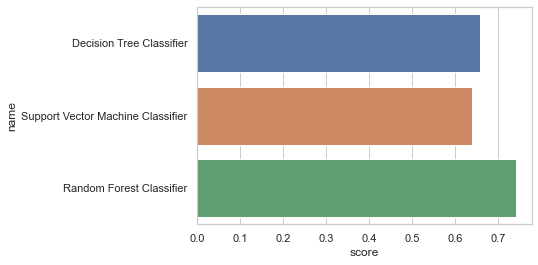

In [44]:
# Plotting the performance

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [45]:
# Importing the PICKLE library to save the model in .pkl or .sav format
import pickle

#Saving Random Forest model
filename = 'rfcgrid_classifier_new.sav'
pickle.dump(rf_grid, open(filename, 'wb'))